In [16]:
methods = ["CEI", "Sobol"]
marker = dict(zip(methods, ["o", ""]))
func = ["Branin2D"]
CI = 0.68
qmin, qmax = (1-CI)/2, 1-(1-CI)/2
qmin, qmax, qmax - qmin

(0.15999999999999998, 0.8400000000000001, 0.6800000000000002)

In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from myvis import set_colormap
import functions
%config InlineBackend.figure_formats = {'png', 'retina'}

In [18]:
set_colormap()
plt.rcParams['axes.axisbelow'] = True

In [19]:
func_dict = functions.get_func_dict()
func_dict

{'TCS3D': functions.TCS3D,
 'PVD4D': functions.PVD4D,
 'WBD4D': functions.WBD4D,
 'SD7D': functions.SD7D,
 'Ackley10D': functions.Ackley10D,
 'Ackley6D': functions.Ackley6D,
 'Keane30D': functions.Keane30D,
 'Toy2D': functions.Toy2D,
 'Rosenbrock5D': functions.Rosenbrock5D,
 'Branin2D': functions.Branin2D}

/home/yoshizawa/BPBO/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/yoshizawa/BPBO/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/yoshizawa/BPBO/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/yoshizawa/BPBO/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


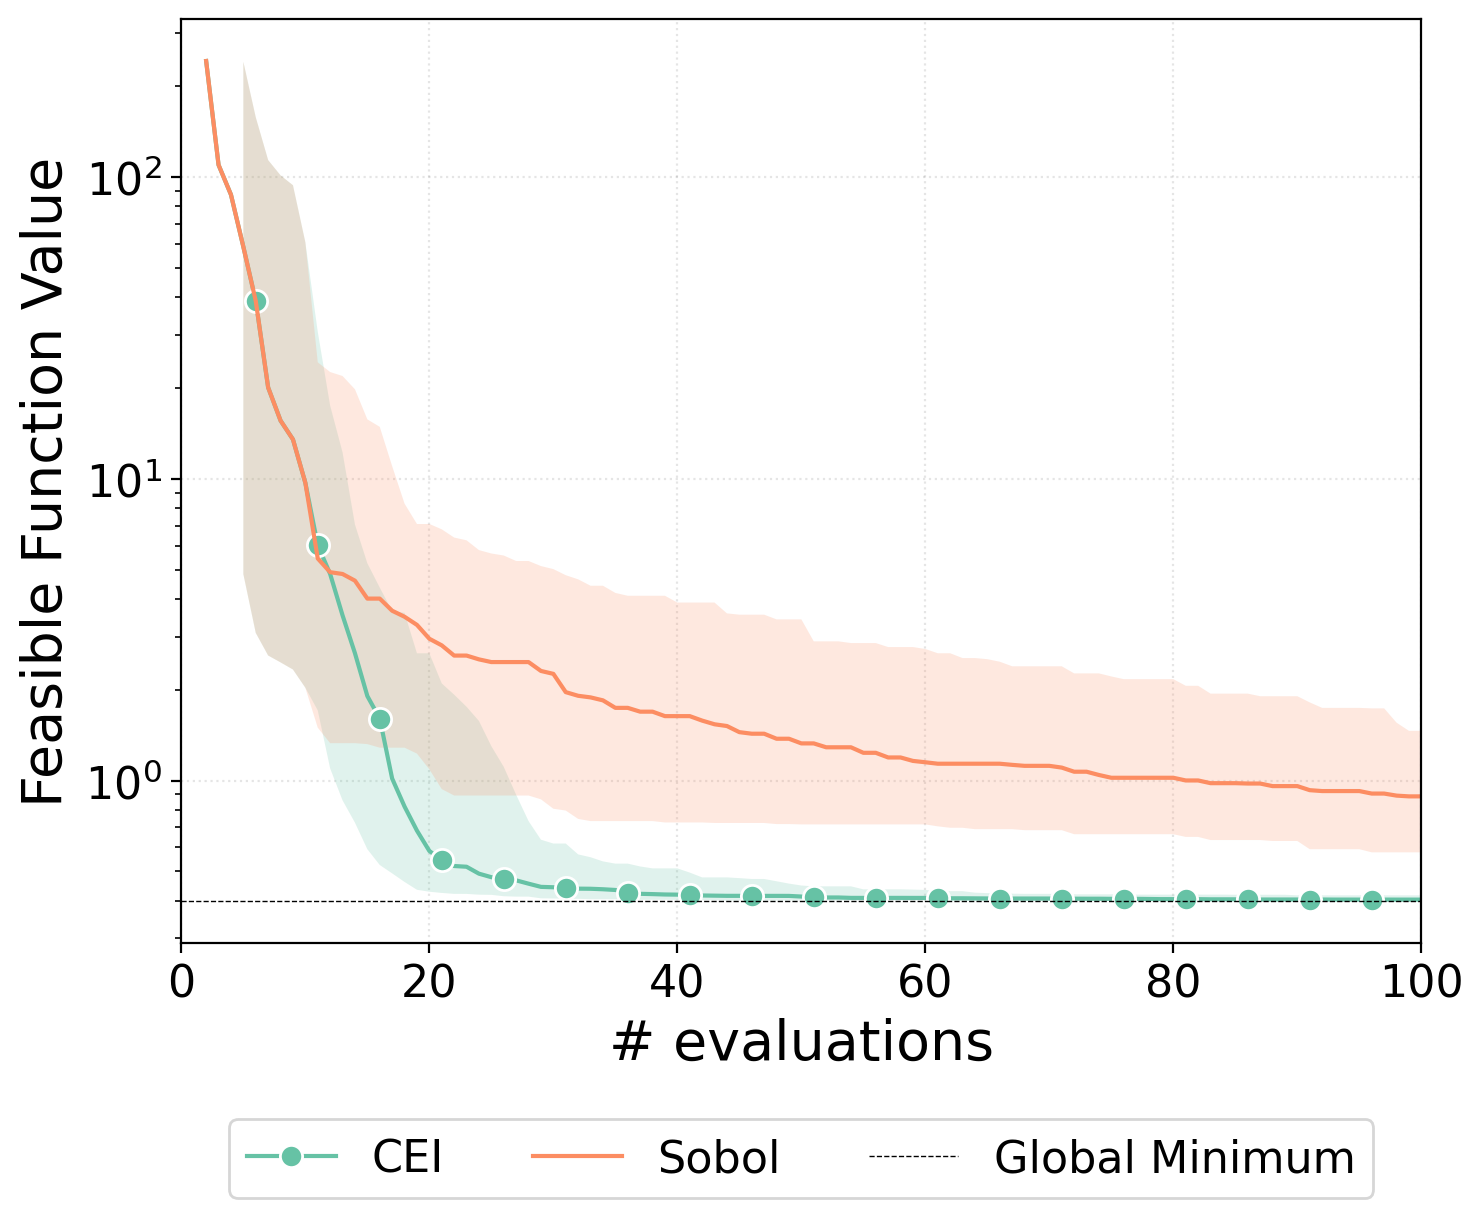

In [20]:
for f in func:
    plt.figure(figsize=(8,6))
    globalMin = func_dict[f]()._optimal_value
    for m in methods:
        parent = Path(f"./log/{f}/{m}")
        df = []
        for p in sorted(list(parent.glob("*.csv"))):
            d = pd.read_csv(p).set_index("Sample").y_best
            d.name = p.name.replace("seed_", "").replace(".csv", "")
            df.append(d)
        df = pd.concat(df, axis=1)
        mean, low, upp = df.quantile(0.5, axis=1), df.quantile(qmin, axis=1), df.quantile(qmax, axis=1)
        plt.fill_between(mean.index, low, upp, alpha=0.2)
        mean.plot(marker=marker[m], markevery=5, mew=1, mec="white", ms=8, label=m)
    plt.grid(ls=":", c="black", alpha=0.1)
    plt.yscale("log")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("# evaluations", fontsize=20)
    plt.ylabel("Feasible Function Value", fontsize=20)
    plt.xlim(0,100)
    plt.axhline(globalMin, c="black", ls="--", lw=0.5, label="Global Minimum")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=16)